In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data.dataloader import DataLoader
from torchvision.transforms import ToTensor
from torchvision.datasets import DatasetFolder
import numpy as np
from PIL import Image
from torch.utils.data import Dataset, TensorDataset

In [2]:
X_data = []
for file in os.listdir('X_train/'):
    input_image = Image.open('X_train/' + file)
    convert_tensor = ToTensor()
    input_tensor = convert_tensor(input_image)
    
    
for file in os.listdir('Y_train/'):
    output_image = Image.open('Y_train/' + file)
    convert_tensor = ToTensor()
    output_tensor = convert_tensor(output_image)
    


In [14]:
size = (800,540)

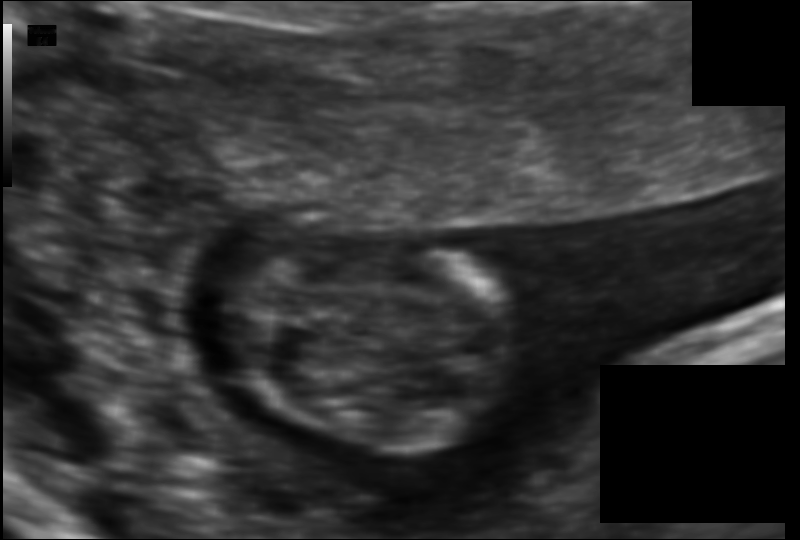

In [3]:
input_image

In [20]:
os.listdir('X_train')

['100_2HC.png',
 '101_HC.png',
 '102_2HC.png',
 '103_HC.png',
 '104_HC.png',
 '105_HC.png',
 '106_HC.png',
 '107_HC.png',
 '108_2HC.png',
 '109_HC.png',
 '10_2HC.png',
 '110_HC.png',
 '111_HC.png',
 '112_HC.png',
 '113_HC.png',
 '114_2HC.png',
 '115_HC.png',
 '116_HC.png',
 '117_HC.png',
 '118_HC.png',
 '119_HC.png',
 '11_2HC.png',
 '120_HC.png',
 '121_HC.png',
 '122_2HC.png',
 '123_HC.png',
 '124_2HC.png',
 '125_2HC.png',
 '126_HC.png',
 '127_HC.png',
 '128_HC.png',
 '129_HC.png',
 '12_HC.png',
 '130_HC.png',
 '131_2HC.png',
 '132_HC.png',
 '133_2HC.png',
 '134_3HC.png',
 '135_HC.png',
 '136_HC.png',
 '137_HC.png',
 '138_HC.png',
 '139_HC.png',
 '13_HC.png',
 '140_HC.png',
 '141_HC.png',
 '142_HC.png',
 '143_HC.png',
 '144_HC.png',
 '145_HC.png',
 '146_HC.png',
 '147_HC.png',
 '148_2HC.png',
 '149_HC.png',
 '14_HC.png',
 '150_HC.png',
 '151_HC.png',
 '152_2HC.png',
 '153_HC.png',
 '154_2HC.png',
 '155_3HC.png',
 '156_HC.png',
 '157_2HC.png',
 '158_3HC.png',
 '159_HC.png',
 '15_HC.png'

In [22]:
os.listdir('Y_train')

['100_2HC_Annotation.png',
 '101_HC_Annotation.png',
 '102_2HC_Annotation.png',
 '103_HC_Annotation.png',
 '104_HC_Annotation.png',
 '105_HC_Annotation.png',
 '106_HC_Annotation.png',
 '107_HC_Annotation.png',
 '108_2HC_Annotation.png',
 '109_HC_Annotation.png',
 '10_2HC_Annotation.png',
 '110_HC_Annotation.png',
 '111_HC_Annotation.png',
 '112_HC_Annotation.png',
 '113_HC_Annotation.png',
 '114_2HC_Annotation.png',
 '115_HC_Annotation.png',
 '116_HC_Annotation.png',
 '117_HC_Annotation.png',
 '118_HC_Annotation.png',
 '119_HC_Annotation.png',
 '11_2HC_Annotation.png',
 '120_HC_Annotation.png',
 '121_HC_Annotation.png',
 '122_2HC_Annotation.png',
 '123_HC_Annotation.png',
 '124_2HC_Annotation.png',
 '125_2HC_Annotation.png',
 '126_HC_Annotation.png',
 '127_HC_Annotation.png',
 '128_HC_Annotation.png',
 '129_HC_Annotation.png',
 '12_HC_Annotation.png',
 '130_HC_Annotation.png',
 '131_2HC_Annotation.png',
 '132_HC_Annotation.png',
 '133_2HC_Annotation.png',
 '134_3HC_Annotation.png',
 '1

## DATASET

In [23]:
class BiomedDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform = None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = os.listdir(image_dir)
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.image_dir , self.images[index])
        mask_path = os.path.join(self.mask_dir , self.images[index].replace('.png', '_Annotation.png'))
        image = np.array(Image.open(img_path))
        mask = np.array(Image.open(mask_path), dtype = np.float32)
        #mask[mask == 255.0] = 1.0
        
        return image, mask
        
         
        